In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Setup basic logging to stdout
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [2]:
def _setup_plot_style():
    """
    Setup a basic clean plot style for matplotlib.
    """
    # Attempt to use a clean style if available, otherwise fallback
    try:
        plt.style.use("seaborn-v0_8-whitegrid")
    except OSError:
        plt.style.use("ggplot")  # Fallback

In [5]:
def plot_coverage(
    k: np.ndarray,
    n: np.ndarray,
    d: np.ndarray,
    save_dir: Path | None = None,
    show: bool = False,
    seed: int = 42,
) -> None:
    """
    Plot 2D coverage scatter plots in a single figure with 3 subplots:
    (n vs d), (k vs n), (k vs d).
    Adds jitter to k for better visualization.
    """

    plt.rcParams.update(
        {
            "text.usetex": True,
            "font.family": "serif",
            "font.serif": ["Computer Modern Roman"],
            "pdf.fonttype": 42,
            "ps.fonttype": 42,
            "axes.titlesize": 22,
            "axes.labelsize": 20,
            "legend.fontsize": 20,
            "xtick.labelsize": 16,
            "ytick.labelsize": 16,
        }
    )
    rng = np.random.default_rng(seed)
    k_jittered = k + rng.normal(0, 0.05, size=len(k))

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    plots = [
        (n, d, "Number of objects ($n$)", "Number of features ($m$)", "(a)"),
        (k_jittered, n, "Number of clusters (k)", "Number of objects ($n$)", "(b)"),
        (k_jittered, d, "Number of clusters (k)", "Number of features ($m$)", "(c)"),
    ]
    for ax, (x_data, y_data, x_lbl, y_lbl, title) in zip(axs, plots):
        ax.scatter(x_data, y_data, s=15, alpha=0.6, edgecolors="none")
        ax.set_title(title, loc="left")
        ax.set_xlabel(x_lbl)
        ax.set_ylabel(y_lbl)
        ax.grid(True, alpha=0.3)

    plt.tight_layout()

    if save_dir:
        save_dir.mkdir(parents=True, exist_ok=True)
        save_path = save_dir / "config_coverage.pdf"
        fig.savefig(save_path, dpi=600, format="pdf", bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close(fig)

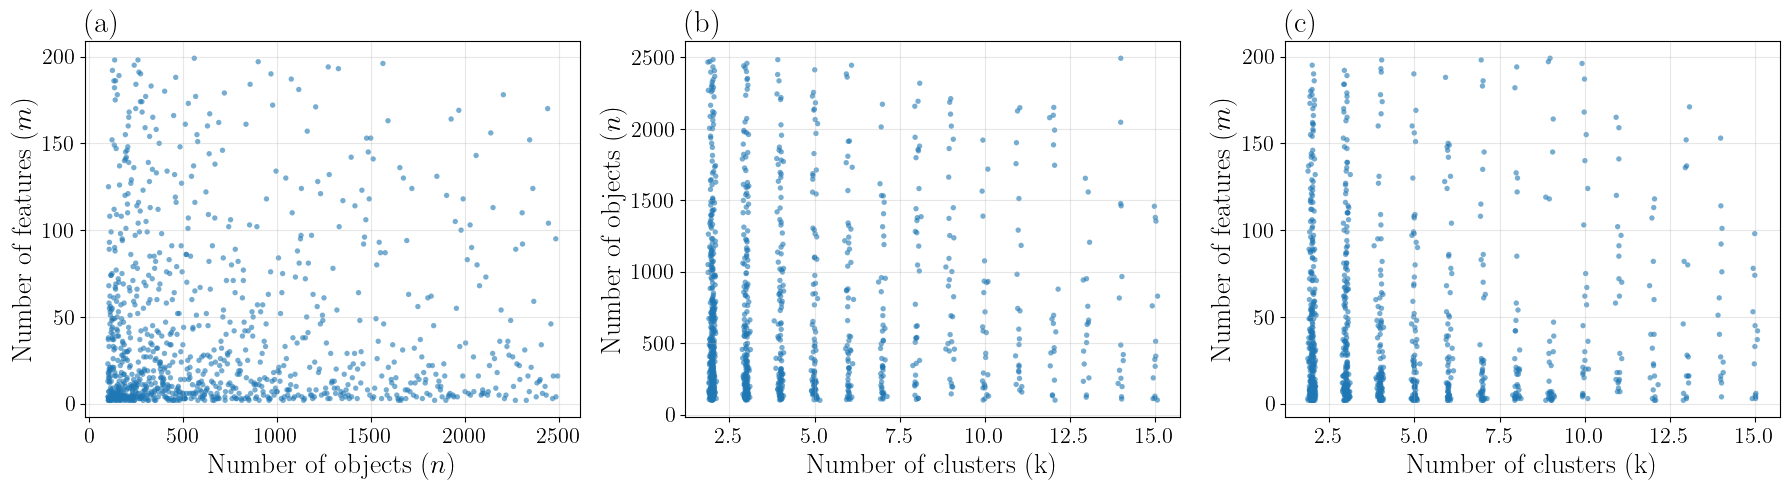

In [6]:
# Define paths
parent_dir = Path('results')
config_file = parent_dir / 'generated_configs.csv'

# Read the data
df = pd.read_csv(config_file)

# Extract arrays
k = df['num_clusters'].values
n = df['num_samples'].values
d = df['num_dimensions'].values

# Generate the plot
plot_coverage(k, n, d, save_dir=Path("results/figures"), show=True)